In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical 
from keras.layers import Conv2D, MaxPool2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU
from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import BatchNormalization
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

import tensorflow as tf

2023-05-17 01:03:33.000935: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2023-05-17 01:03:34.375702: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-17 01:03:34.381262: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-17 01:03:34.393177: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

# Definitions

In [3]:
WIDTH, HEIGHT = IMAGE_SIZE = (128, 128)
DEPTH = 3
DATASET_PATH = "dataset"
EPOCS = 50

# Data Preprocessing

### Preprocessing the Training set

In [4]:
training_datagen = ImageDataGenerator(rescale = 1./255,
                                       shear_range = 0.2,
                                       horizontal_flip = True,
                                       vertical_flip = True,
                                       width_shift_range = 0.2,
                                       height_shift_range = 0.2,
                                       rotation_range = 30)

training_set = training_datagen.flow_from_directory(DATASET_PATH + "/train",
                                                 target_size=IMAGE_SIZE,
                                                 batch_size=10,
                                                 class_mode = 'sparse')

Found 39 images belonging to 2 classes.


In [5]:
class_indices = training_set.class_indices
num_classes = len(class_indices)
train_labels = training_set.classes
train_labels = to_categorical(train_labels, num_classes=len(class_indices))
class_indices

{'9v': 0, 'AA': 1}

### Preprocessing the Test set

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2)
test_set = test_datagen.flow_from_directory(DATASET_PATH + "/test",
                                            target_size = IMAGE_SIZE,
                                            batch_size = 10,
                                            class_mode = 'sparse')

Found 7 images belonging to 2 classes.


# Building the CNN


In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(HEIGHT, WIDTH, DEPTH)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))

2023-05-17 01:03:37.025211: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-17 01:03:37.028757: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-17 01:03:37.031227: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Step 2- Adding a second convolutional layer

### Step 3 - Flattening

### Step 4 - Full Connection

### Step 5 - Output Layer

# Part 3 - Training the CNN

### Compiling the CNN

### Training the CNN on the Training set and evaluating it on the Test set

In [9]:
history = model.fit(x = training_set, validation_data = test_set, epochs = EPOCS)

Epoch 1/50


2023-05-17 01:03:43.570378: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-05-17 01:03:44.458917: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-05-17 01:03:44.897366: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f9c871df8d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-17 01:03:44.897394: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2023-05-17 01:03:44.900501: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-17 01:03:

4/4 [==============================] - 3s 153ms/step - loss: 1.3203 - accuracy: 0.3590 - val_loss: 1.4482 - val_accuracy: 0.5714
Epoch 2/50


2023-05-17 01:03:46.184301: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


4/4 [==============================] - 0s 44ms/step - loss: 1.0783 - accuracy: 0.5128 - val_loss: 0.8354 - val_accuracy: 0.4286
Epoch 3/50
4/4 [==============================] - 0s 42ms/step - loss: 0.7526 - accuracy: 0.5385 - val_loss: 0.7469 - val_accuracy: 0.4286
Epoch 4/50
4/4 [==============================] - 0s 42ms/step - loss: 0.6589 - accuracy: 0.7436 - val_loss: 0.5483 - val_accuracy: 0.7143
Epoch 5/50
4/4 [==============================] - 0s 42ms/step - loss: 0.5448 - accuracy: 0.7179 - val_loss: 0.5478 - val_accuracy: 0.5714
Epoch 6/50
4/4 [==============================] - 0s 44ms/step - loss: 0.5591 - accuracy: 0.6154 - val_loss: 0.5936 - val_accuracy: 0.5714
Epoch 7/50
4/4 [==============================] - 0s 41ms/step - loss: 0.4592 - accuracy: 0.7692 - val_loss: 0.5657 - val_accuracy: 0.7143
Epoch 8/50
4/4 [==============================] - 0s 45ms/step - loss: 0.5465 - accuracy: 0.7179 - val_loss: 0.5001 - val_accuracy: 0.7143
Epoch 9/50
4/4 [======================

1/1 - 0s - loss: 0.7178 - accuracy: 0.7143 - 45ms/epoch - 45ms/step


2023-05-17 01:03:55.000512: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


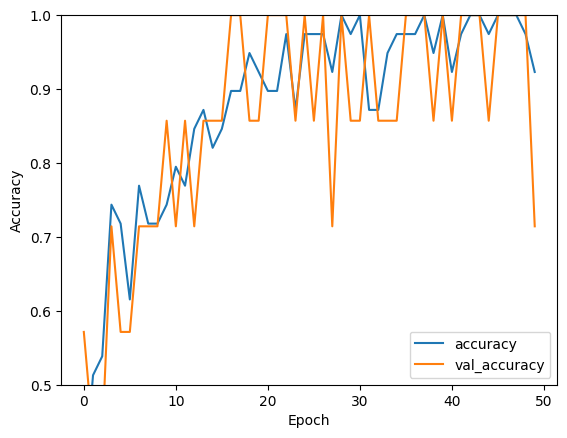

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_set, verbose=2)

In [11]:
print(test_acc)

0.7142857313156128


# Saving the model

In [12]:
model.save(f'models/model_{EPOCS}_{datetime.now().isoformat()}')

INFO:tensorflow:Assets written to: models/model_50_2023-05-17T01:04:00.236352/assets


INFO:tensorflow:Assets written to: models/model_50_2023-05-17T01:04:00.236352/assets
